<a href="https://colab.research.google.com/github/IlyasNasirov/notebook/blob/main/housing_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
from sklearn.model_selection import GridSearchCV
from torch import nn
from torch import optim
from sklearn.impute import SimpleImputer


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IlyasNasirov/datasets/refs/heads/main/housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
x= df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [ ]:
sc = StandardScaler()
oe = OneHotEncoder()

In [ ]:
numerical = x.select_dtypes(include=['int64','float64']).columns
categorical = x.select_dtypes(include=['object']).columns

In [ ]:
numerical_pipline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',sc)
])
categorical_pipline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',oe)
])


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_pipline,numerical),
    ('cat',categorical_pipline,categorical)
])

In [ ]:
x_pocessend = preprocessor.fit_transform(x)
y_processend = np.log1p(y)

In [ ]:
x_train ,x_test,y_train,y_test = train_test_split(x_pocessend,y_processend,test_size=0.2,random_state=42)

In [ ]:
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1,1)
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1,1)

In [ ]:
print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([16512, 13])
torch.Size([16512, 1])
torch.Size([4128, 13])
torch.Size([4128, 1])


In [ ]:
class Housing(nn.Module):
  def __init__(self,input_size,):
    super().__init__()
    self.layer1 = nn.Linear(input_size,64)
    self.layer2 = nn.Linear(64,32)
    self.layer3 = nn.Linear(32,16)
    self.layer4 = nn.Linear(16,8)
    self.layer5 = nn.Linear(8,1)
    self.dropout = nn.Dropout(0.25)
    # # self.relu = nn.ReLU()
    # self.relu = nn.LeakyReLU()
  def forward(self,x):
    x = torch.relu(self.layer1(x))
    x = self.dropout(x)
    x = torch.relu(self.layer2(x))
    x = self.dropout(x)
    x = torch.relu(self.layer3(x))
    x = self.dropout(x)
    x = torch.relu(self.layer4(x))
    x = self.dropout(x)
    x = self.layer5(x)
    return x

In [ ]:
input_size = x_train_tensor.shape[1]
model = Housing(input_size)
criteria = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epoch_num = 400
batch_size = 64
train_loss = []
test_loss = []
for epoch in range(epoch_num):
  model.train()
  epoch_loss = 0
  for i in range(0,len(x_train_tensor),batch_size):
    x_batch = x_train_tensor[i:i+batch_size]
    y_batch = y_train_tensor[i:i+batch_size]
    optimizer.zero_grad()
    y_pred = model(x_batch)
    loss = criteria(y_pred,y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  avarage =epoch_loss/(len(x_train_tensor)/batch_size)
  train_loss.append(avarage)
  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor)
    loss = criteria(y_pred,y_test_tensor)
    test_loss.append(loss.item())
  print(f'Epoch {epoch+1}/{epoch_num}, Train Loss: {avarage:.4f}, Test Loss: {loss.item():.4f}')

  model.eval()

Epoch 1/400, Train Loss: 65.0761, Test Loss: 4.6391
Epoch 2/400, Train Loss: 20.9093, Test Loss: 2.6075
Epoch 3/400, Train Loss: 17.3306, Test Loss: 1.6115
Epoch 4/400, Train Loss: 15.5720, Test Loss: 0.9419
Epoch 5/400, Train Loss: 14.2046, Test Loss: 1.4273
Epoch 6/400, Train Loss: 13.4664, Test Loss: 1.4405
Epoch 7/400, Train Loss: 12.4921, Test Loss: 1.4437
Epoch 8/400, Train Loss: 11.9267, Test Loss: 0.8757
Epoch 9/400, Train Loss: 11.2448, Test Loss: 1.7288
Epoch 10/400, Train Loss: 10.6468, Test Loss: 0.8778
Epoch 11/400, Train Loss: 10.0276, Test Loss: 0.5900
Epoch 12/400, Train Loss: 9.2272, Test Loss: 1.0367
Epoch 13/400, Train Loss: 8.6421, Test Loss: 0.8013
Epoch 14/400, Train Loss: 8.1017, Test Loss: 0.9802
Epoch 15/400, Train Loss: 7.8609, Test Loss: 0.9587
Epoch 16/400, Train Loss: 7.4299, Test Loss: 0.7452
Epoch 17/400, Train Loss: 7.0934, Test Loss: 0.4877
Epoch 18/400, Train Loss: 6.6271, Test Loss: 0.8655
Epoch 19/400, Train Loss: 6.6066, Test Loss: 0.5608
Epoch 20/4

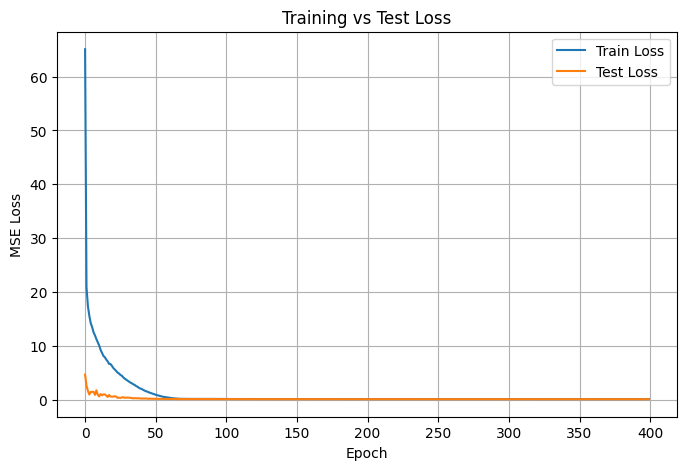

Final Test MSE: 3048233472.00
Final Test R²: 0.7674

Sample predictions vs actual values:
          Actual      Predicted
0   47700.015625   85089.609375
1   45800.007812  103887.359375
2  500000.750000  278720.562500
3  218600.093750  254547.953125
4  278000.093750  261622.781250
5  158700.000000  160946.796875
6  198199.968750  293225.125000
7  157499.968750  187806.578125
8  340000.000000  223676.750000
9  446599.812500  388367.875000


In [ ]:
# Визуализация потерь
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()

# Финальная оценка модели
model.eval()
with torch.no_grad():
    y_pred_test = model(x_test_tensor).numpy().flatten()
    y_true_test = y_test_tensor.numpy().flatten()

# Обратное преобразование из логарифма
y_pred_test_exp = np.expm1(y_pred_test)
y_true_test_exp = np.expm1(y_true_test)

mse = mean_squared_error(y_true_test_exp, y_pred_test_exp)
r2 = r2_score(y_true_test_exp, y_pred_test_exp)

print(f"Final Test MSE: {mse:.2f}")
print(f"Final Test R²: {r2:.4f}")

# Сравнение первых 10 предсказаний с реальными значениями
comparison_df = pd.DataFrame({
    "Actual": y_true_test_exp[:10],
    "Predicted": y_pred_test_exp[:10]
})
print("\nSample predictions vs actual values:")
print(comparison_df)


Epoch 1/400, Train Loss: 5.11219, Test Loss: 0.10777
Epoch 2/400, Train Loss: 0.16463, Test Loss: 0.06944
Epoch 3/400, Train Loss: 0.09563, Test Loss: 0.07167
Epoch 4/400, Train Loss: 0.08164, Test Loss: 0.07353
Epoch 5/400, Train Loss: 0.07622, Test Loss: 0.06096
Epoch 6/400, Train Loss: 0.07040, Test Loss: 0.06920
Epoch 7/400, Train Loss: 0.06941, Test Loss: 0.06710
Epoch 8/400, Train Loss: 0.06801, Test Loss: 0.06491
Epoch 9/400, Train Loss: 0.06312, Test Loss: 0.07207
Epoch 10/400, Train Loss: 0.06272, Test Loss: 0.06753
Epoch 11/400, Train Loss: 0.06116, Test Loss: 0.07337
Epoch 12/400, Train Loss: 0.06042, Test Loss: 0.06296
Epoch 13/400, Train Loss: 0.06043, Test Loss: 0.06310
Epoch 14/400, Train Loss: 0.05868, Test Loss: 0.06541
Epoch 15/400, Train Loss: 0.05442, Test Loss: 0.05119
Epoch 16/400, Train Loss: 0.05316, Test Loss: 0.04939
Epoch 17/400, Train Loss: 0.05314, Test Loss: 0.04608
Epoch 18/400, Train Loss: 0.05305, Test Loss: 0.04696
Epoch 19/400, Train Loss: 0.05214, Te

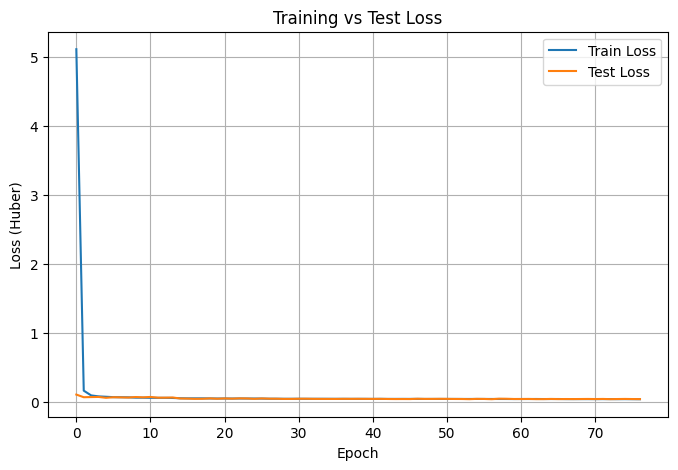


Sample predictions vs actual values:
          Actual      Predicted
0   47700.015625   52155.210938
1   45800.007812   66503.085938
2  500000.750000  320675.250000
3  218600.093750  212306.687500
4  278000.093750  257615.562500
5  158700.000000  149191.609375
6  198199.968750  285351.500000
7  157499.968750  196365.562500
8  340000.000000  219994.421875
9  446599.812500  390887.562500


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import torch
from torch import nn, optim

# =============================
# Load & Preprocess Data
# =============================
df = pd.read_csv('https://raw.githubusercontent.com/IlyasNasirov/datasets/refs/heads/main/housing.csv')

x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

sc = StandardScaler()
oe = OneHotEncoder(handle_unknown="ignore")

numerical = x.select_dtypes(include=['int64', 'float64']).columns
categorical = x.select_dtypes(include=['object']).columns

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', sc)
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', oe)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical),
    ('cat', categorical_pipeline, categorical)
])

x_processed = preprocessor.fit_transform(x)
y_processed = np.log1p(y)  # log-transform target

x_train, x_test, y_train, y_test = train_test_split(
    x_processed, y_processed, test_size=0.2, random_state=42
)

x_train_tensor = torch.FloatTensor(x_train.toarray() if hasattr(x_train, 'toarray') else x_train)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test.toarray() if hasattr(x_test, 'toarray') else x_test)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# =============================
# Model Definition
# =============================
class Housing(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

input_size = x_train_tensor.shape[1]
model = Housing(input_size)

# =============================
# Training Setup
# =============================
criteria = nn.SmoothL1Loss(beta=1.0)  # Huber loss
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=8)

# Early stopping parameters
best_loss = float('inf')
patience = 20
counter = 0

epoch_num = 400
batch_size = 32
train_loss = []
test_loss = []

# =============================
# Training Loop
# =============================
for epoch in range(epoch_num):
    model.train()
    epoch_loss = 0
    for i in range(0, len(x_train_tensor), batch_size):
        x_batch = x_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criteria(y_pred, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / (len(x_train_tensor) / batch_size)
    train_loss.append(avg_train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        y_pred = model(x_test_tensor)
        val_loss = criteria(y_pred, y_test_tensor).item()
    test_loss.append(val_loss)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{epoch_num}, Train Loss: {avg_train_loss:.5f}, Test Loss: {val_loss:.5f}")

    # Early stopping check
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

# =============================
# Load Best Model & Evaluate
# =============================
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
with torch.no_grad():
    y_pred_test = model(x_test_tensor).numpy().flatten()
    y_true_test = y_test_tensor.numpy().flatten()

# Inverse log transform
y_pred_test_exp = np.expm1(y_pred_test)
y_true_test_exp = np.expm1(y_true_test)

mse = mean_squared_error(y_true_test_exp, y_pred_test_exp)
r2 = r2_score(y_true_test_exp, y_pred_test_exp)

print(f"\nFinal Test MSE: {mse:.2f}")
print(f"Final Test R²: {r2:.4f}")

# =============================
# Loss Visualization
# =============================
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (Huber)")
plt.title("Training vs Test Loss")
plt.legend()
plt.grid(True)
plt.show()

# =============================
# Sample Predictions
# =============================
comparison_df = pd.DataFrame({
    "Actual": y_true_test_exp[:10],
    "Predicted": y_pred_test_exp[:10]
})
print("\nSample predictions vs actual values:")
print(comparison_df)
